In [16]:
# The dataset has credit card transactions where our objective is to identify the fraudulent transactions.

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [18]:
data=pd.read_csv(r"C:\Users\HP\Desktop\Datasets_CSV\creditcard.csv")

In [19]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [20]:
data.shape

(56962, 30)

In [21]:

# Checking the distribution of two classes in the target variable
data.Target.value_counts()
     

Target
0    56864
1       98
Name: count, dtype: int64

In [22]:
# Clearly the dataset is heavily imbalanced!

In [23]:

# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

In [24]:
# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

In [25]:
#1)Split the dataset into train and test using stratified sampling on our dependent variable.
#2)Using a stratified sampling ensures the distribution of dependent variable remains same across train and test datasets

In [26]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)
     

In [27]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(45569, 29)

 The shape of test dataset :
(11393, 29)


In [28]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
Target
0    45491
1       78
Name: count, dtype: int64

 Distribution of classes of dependent variable in test :
Target
0    11373
1       20
Name: count, dtype: int64


In [29]:
# Hyperparameter tuning

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [30]:
# Predicting on both train and test dataset using the fitted model

In [31]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [32]:
# Obtain accuracy on train set
accuracy_score(Y_train,train_preds)

0.9996269393666747

In [33]:
# Obtain accuracy on test set
accuracy_score(Y_test,test_preds)

0.9994733608356008

In [34]:
# Accuracy is not a good metric to evaluate our model since the dataset is heavily imbalanced. Thus we will use roc_auc score

In [35]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

0.891025641025641

In [36]:

# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

array([[45491,     0],
       [   17,    61]], dtype=int64)

In [37]:

# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

array([[11372,     1],
       [    5,    15]], dtype=int64)

In [38]:

# Plot the variable importance

In [40]:

features = X_train.columns
importances = classifier.best_estimator_.feature_importances_
indices = np.argsort(importances)
     

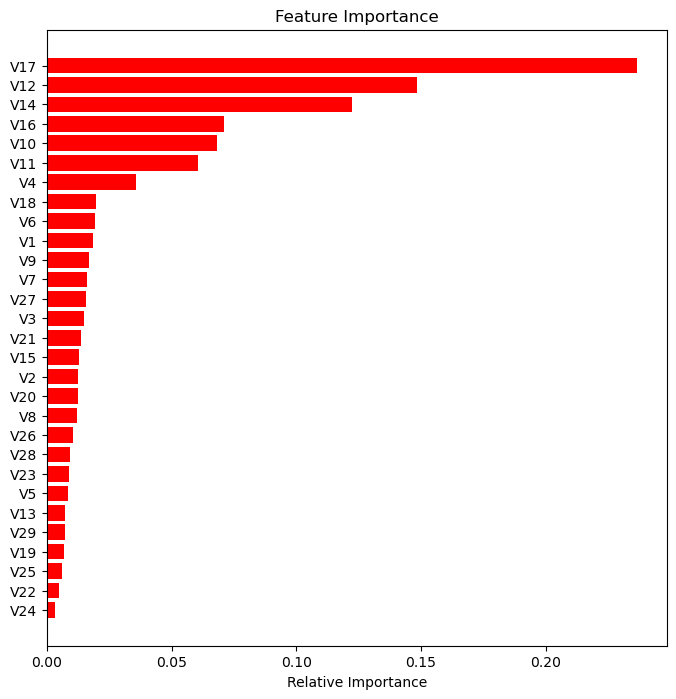

In [41]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()